<a href="https://colab.research.google.com/github/IsmaTariq18/Machine-Learning-Tasks-DEP/blob/main/ML_Task_1_DEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#**Section I: Minning of Dataset**

In [ ]:
df = pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#**Section II: Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


**Visualization of Data (w.r.t Price and Area)**

<Axes: xlabel='price', ylabel='area'>

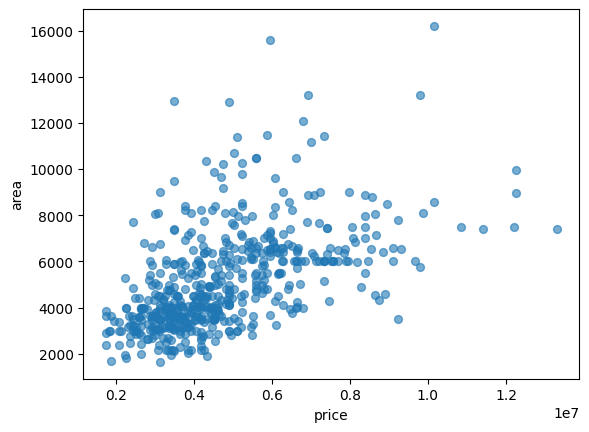

In [ ]:
df.plot(kind = 'scatter', x = 'price', y = 'area', s = 32, alpha = 0.6)

**Sequence wise Count of (Stories column) of Data Frame**

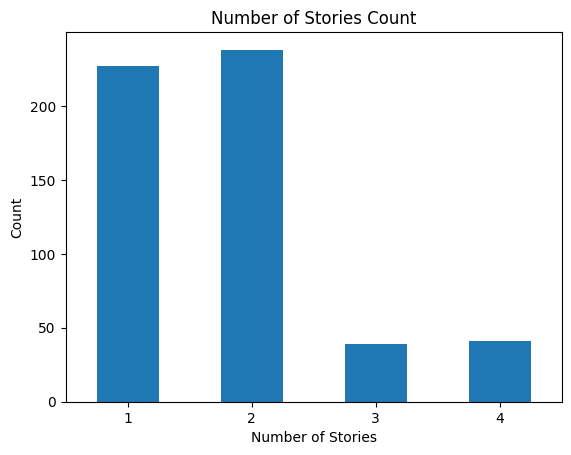

In [ ]:
stories_count = df['stories'].value_counts()
stories_count_sorted = stories_count.sort_index()
stories_count_sorted.plot(kind='bar')
plt.title('Number of Stories Count')
plt.xlabel('Number of Stories')
plt.ylabel('Count')

plt.xticks(rotation = 0)
plt.show()

**Sequence wise Count of (Bedrooms column) of Data Frame**

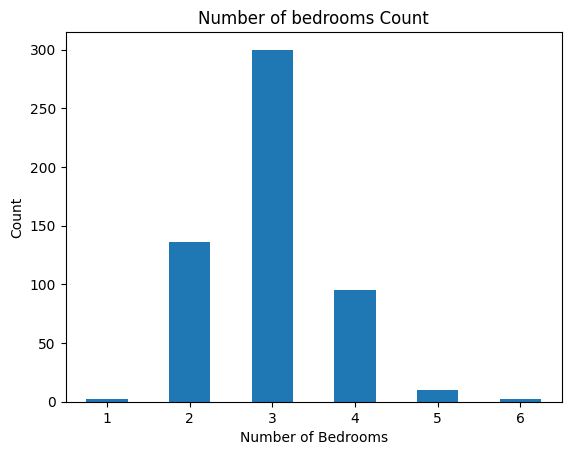

In [ ]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count_sorted = bedrooms_count.sort_index()
bedrooms_count_sorted.plot(kind='bar')
plt.title('Number of bedrooms Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

plt.xticks(rotation = 0)
plt.show()

**Sequence wise Count of (Bathrooms column) of Data Frame**

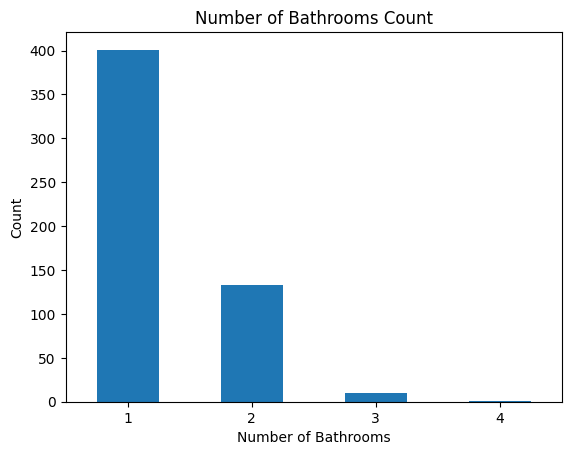

In [ ]:
bathrooms_count = df['bathrooms'].value_counts()
bathrooms_count_sorted = bathrooms_count.sort_index()
bathrooms_count_sorted.plot(kind='bar')
plt.title('Number of Bathrooms Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

plt.xticks(rotation = 0)
plt.show()

**Count of Houses on Main Road**

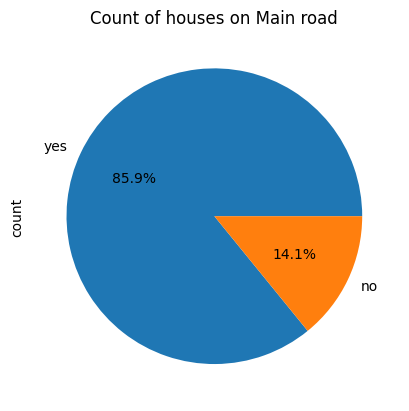

In [ ]:
mainroad_count = df['mainroad'].value_counts()
mainroad_count.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Count of houses on Main road')

plt.show()

**Count of Houses with guestroom**

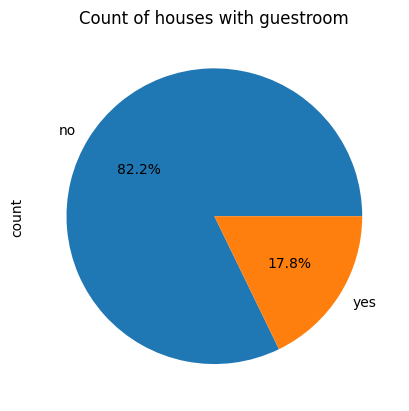

In [ ]:
guestroom_count = df['guestroom'].value_counts()
guestroom_count.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Count of houses with guestroom')

plt.show()

**Count of Houses with furnishing**

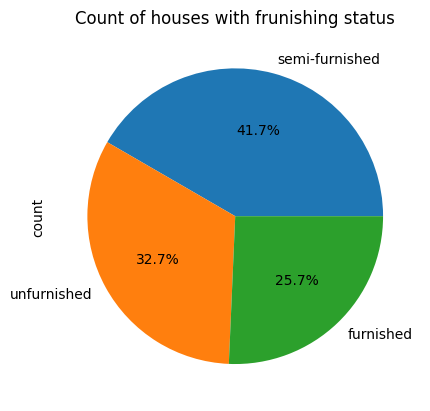

In [ ]:
furnishing_status = df['furnishingstatus'].value_counts()
furnishing_status.plot(kind='pie', autopct = '%1.1f%%')
plt.title('Count of houses with frunishing status')

plt.show()

#**Section III: Pre-Processing of Data Frame**

In [ ]:
encoder = LabelEncoder()

In [ ]:
encoding_col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for col in encoding_col:
  df[col] = encoder.fit_transform(df[col])

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


#**Section IV: Feature Engineering**

In [ ]:
x = df.drop(columns = 'price', axis = 1)
y = df['price']

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [ ]:
x

array([[0.39656357, 0.6       , 0.33333333, ..., 0.66666667, 1.        ,
        0.        ],
       [0.5024055 , 0.6       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.57113402, 0.4       , 0.33333333, ..., 0.66666667, 1.        ,
        0.5       ],
       ...,
       [0.13539519, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08659794, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15120275, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


#**Section V: Linear Model**

In [ ]:
ln_model = LinearRegression()
ln_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = ln_model.predict(x_test)

In [ ]:
y_pred

array([[0.29902093],
       [0.47679688],
       [0.11366481],
       [0.24325469],
       [0.13705042],
       [0.15697668],
       [0.33726981],
       [0.40380776],
       [0.08708498],
       [0.07956179],
       [0.67710825],
       [0.09328411],
       [0.12516764],
       [0.13872416],
       [0.17003286],
       [0.30745353],
       [0.10717924],
       [0.26500431],
       [0.22796811],
       [0.15368764],
       [0.3503255 ],
       [0.35411261],
       [0.08746447],
       [0.26083032],
       [0.29911305],
       [0.49918119],
       [0.13027547],
       [0.30183242],
       [0.55658209],
       [0.14581525],
       [0.40640014],
       [0.13818223],
       [0.43223591],
       [0.20821964],
       [0.15923398],
       [0.34962129],
       [0.26133075],
       [0.22871723],
       [0.12706987],
       [0.25006031],
       [0.24001388],
       [0.15508953],
       [0.4751633 ],
       [0.19666803],
       [0.16900249],
       [0.22068221],
       [0.42900468],
       [0.194

#**Section VI: Evaluation and Fine tunning of Model**

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [ ]:
mae

0.08482075249315932

In [ ]:
mse

0.013281243729270737

In [ ]:
ln_acc = r2_score(y_test,y_pred)
ln_acc

0.6494754192267794